Library Imports

In [1]:
import glob
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

2023-01-20 12:49:33.071299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
subfolder_names = glob.glob("David_Training")

X = []
y = []
size=(64,64)

for subfolder_name in subfolder_names:
    subsubfolder_names = glob.glob(f"{subfolder_name}/*")

    for subsubfolder_name in subsubfolder_names:
        image_filenames = glob.glob(f"{subsubfolder_name}/*")

        for filename in image_filenames:
            # L=Grayscale
            try:
                image = Image.open(filename).convert("L")
                image=image.resize(size,Image.ANTIALIAS)
            except:
                continue
            X.append(np.array(image))
            y.append(subsubfolder_name)
        
train_data = np.array(X)
train_labels = np.array(y)

Extract just the number as labels

In [3]:
train_labels = [int(string[15:]) for string in train_labels]

Confirm all 27 classes exist

In [4]:
train_labels=np.array(train_labels)
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

Test Set Pull

In [5]:
subfolder_names = glob.glob("David_Testing")

X = []
y = []
size=(64,64)
for subfolder_name in subfolder_names:
    subsubfolder_names = glob.glob(f"{subfolder_name}/*")

    for subsubfolder_name in subsubfolder_names:
        image_filenames = glob.glob(f"{subsubfolder_name}/*")
        for filename in image_filenames:
            # L=Grayscale
            try:
                image = Image.open(filename).convert("L")
                image=image.resize(size,Image.ANTIALIAS)
            except:
                continue
            X.append(np.array(image))
            y.append(subsubfolder_name)

test_data = np.array(X)
test_labels = np.array(y)

Extract Labels

In [6]:
test_labels = [int(string[14:]) for string in test_labels]

Confirm Labels

In [7]:
test_labels=np.array(test_labels)
np.unique(test_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

Model Archetitecture with three Convolutional Layers, first with 16 nodes, second with 32 nodes, then with 64 nodes

In [8]:
# Define the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(64, 64, 1)))
model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(27))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=15)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


2023-01-20 12:49:39.537010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/15
17/17 [==============================] - 2s 38ms/step - loss: 3.3068 - accuracy: 0.0278
Epoch 2/15
17/17 [==============================] - 1s 39ms/step - loss: 3.2271 - accuracy: 0.0852
Epoch 3/15
17/17 [==============================] - 1s 39ms/step - loss: 2.8029 - accuracy: 0.2870
Epoch 4/15
17/17 [==============================] - 1s 39ms/step - loss: 1.9479 - accuracy: 0.4870
Epoch 5/15
17/17 [==============================] - 1s 38ms/step - loss: 1.3322 - accuracy: 0.6556
Epoch 6/15
17/17 [==============================] - 1s 40ms/step - loss: 0.9697 - accuracy: 0.7444
Epoch 7/15
17/17 [==============================] - 1s 44ms/step - loss: 0.7078 - accuracy: 0.8037
Epoch 8/15
17/17 [==============================] - 1s 45ms/step - loss: 0.4522 - accuracy: 0.8815
Epoch 9/15
17/17 [==============================] - 1s 43ms/step - loss: 0.2628 - accuracy: 0.9352
Epoch 10/15
17/17 [==============================] - 1s 43ms/step - loss: 0.1575 - accuracy: 0.9667
Epoch 11/

loss vs accuracy

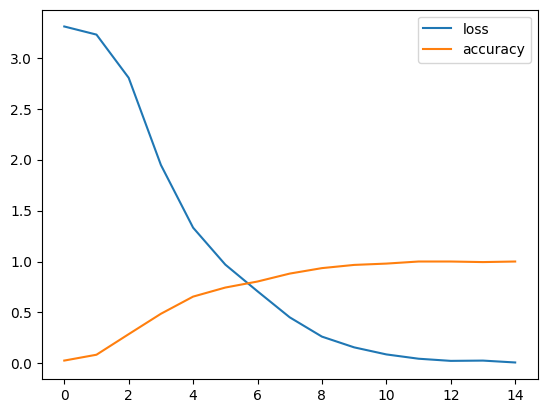

In [9]:

# Create the plot
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

# Add a legend
plt.legend(['loss', 'accuracy'])

# Show the plot
plt.show()

Individual test

In [10]:
# Load the drawing and convert it to grayscale
drawing = Image.open("Untitled.png").convert("L")
drawing=drawing.resize(size,Image.ANTIALIAS)

# Convert the drawing to a numpy array
drawing = np.array(drawing)
drawing = np.expand_dims(drawing, axis=0)
drawing = np.expand_dims(drawing, axis=-1)

# Make a prediction using the model
prediction = model.predict(drawing)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)
print(prediction)

1/1 [==============================] - 0s 112ms/step
[[ -2.9575942   -3.9148736    3.6287234    1.6532345   -7.8325353
    4.3582153    4.5164137   -7.718651    -2.538758    -5.134767
   -3.6542268   -8.060388     6.2895756    0.7159592   -4.8225856
   18.48025     -5.0463185   -6.5887713   -1.6062572    4.7087536
   -2.272944     0.09553709  -1.5860469   -4.8236604  -13.102273
   -0.8372511   -6.1982555 ]]


Class predictor and output

In [11]:
dict= {
    0: "Aleph",
    1: "Bet",
    2: "Gimel",
    3: "Dalet",
    4: "Hei",
    5: "Vav",
    6: "Zayin",
    7: "Chet",
    8: "Tet",
    9: "Yod",
    10: "Kaf",
    11: "Kaf Sofit",
    12: "Lamed",
    13: "Mem",
    14: "Mem Sofit",
    15: "Nun",
    16: "Nun Sofit",
    17: "Samech",
    18: "Ayin",
    19: "Pei",
    20: "Pei Sofit",
    21: "Tsadei",
    22: "Tsadei Sofit",
    23: "Qof",
    24: "Resh",
    25: "Shin",
    26: "Tav",
}

print(predicted_class)
print(dict[predicted_class])

15
Nun
